# K-Means Algoritması

Öncelikle, ***K-Means algoritması*** bir sınıflandırma algoritmasıdır ve veri kümelerini k-sayıda gruplara ayırmayı amaçlar. Bu algoritma, veri setlerinde bulunan verileri gruplara ayıran bir sınıflandırma algoritmasıdır. Örneğin, müşteri verilerini sınıflandırırken kullanılabilir veya sosyal ağ verilerini gruplara ayırırken kullanılabilir.

**Iris veri seti**, iris çiçeğinin özelliklerini içeren bir veri setidir. Bu veri setinde, iris çiçeğinin sepals ve petals uzunluk ve genişlik özellikleri bulunmaktadır. Bu veri seti, sınıflandırma algoritmalarının test edilmesinde sıkça kullanılır.

Iris veri seti, çiçeklerin uzunluk ve genişlik ölçümlerini içeren bir veri setidir. Bu veri setini kullanarak, K-Means algoritmasını kullanarak çiçekleri 3 farklı tipe ayırmayı deneyeceğiz.


İlk olarak, gerekli kütüphaneleri içe aktarın ve veri setini yüklüyoruz:

In [2]:
# veri setini yüklemek için
from sklearn.datasets import load_iris
# verileri eğitim ve test veri setlerine ayırmak için
from sklearn.model_selection import train_test_split
# K-Means algoritmasını uygulamak için
from sklearn.cluster import KMeans
# sınıflandırma sonuçlarını değerlendirmek için
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
# histogram oluşturmak için
import matplotlib.pyplot as plt
import seaborn as sns

Daha sonra, Iris veri setini yükleyip ve verileri ve hedef etiketleri ayrıştırıyoruz:

In [3]:
# Iris veri setini yükle
iris_dataset = load_iris()

# verileri ayrıştır
X = iris_dataset.data
y = iris_dataset.target

# veri setini incele
print("Veri Seti Özellikleri:")
print(iris_dataset.feature_names)
print("Veri Seti Örnekleri:")
print(X[:5])
print("Veri Seti Hedef Etiketleri:")
print(y)


Veri Seti Özellikleri:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Veri Seti Örnekleri:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Veri Seti Hedef Etiketleri:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Verilerin histogramını oluşturuyoruz:

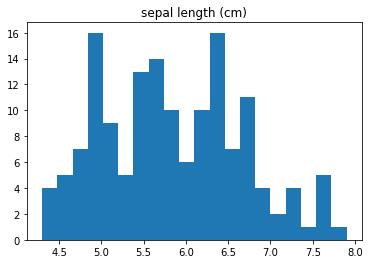

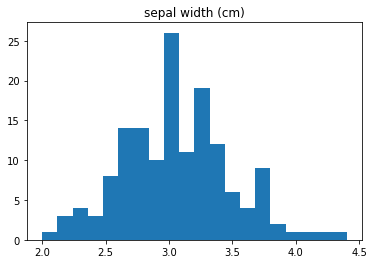

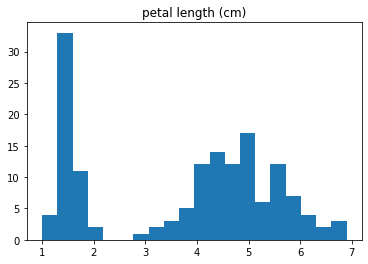

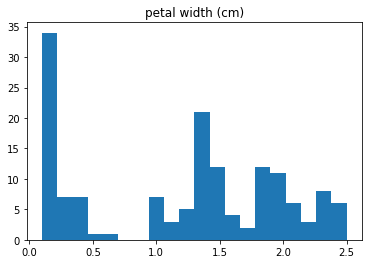

In [5]:
# histogram oluştur
for i in range(4):
    plt.hist(X[:, i], bins=20)
    plt.title(iris_dataset.feature_names[i])
    plt.show()

Verileri eğitim ve test veri setlerine ayırmak için ***train_test_split*** fonksiyonunu kullanacağız:

In [11]:
# verileri eğitim ve test veri setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# ayırılan veri setlerini incele
print("Train Veri Seti Örnekleri:")
print(X_train[:5])
print("Test Veri Seti Örnekleri:")
print(X_test[:5])
print("Train Veri Seti Hedef Etiketleri:")
print(y_train)
print("Test Veri Seti Hedef Etiketleri:")
print(y_test)

Train Veri Seti Örnekleri:
[[4.5 2.3 1.3 0.3]
 [6.7 3.  5.  1.7]
 [4.8 3.1 1.6 0.2]
 [6.  2.2 4.  1. ]
 [5.1 2.5 3.  1.1]]
Test Veri Seti Örnekleri:
[[6.7 3.1 4.7 1.5]
 [5.6 2.7 4.2 1.3]
 [6.7 3.1 5.6 2.4]
 [5.9 3.  4.2 1.5]
 [5.8 2.7 4.1 1. ]]
Train Veri Seti Hedef Etiketleri:
[0 1 0 1 1 0 1 2 0 1 0 1 1 2 1 2 2 1 0 1 2 0 1 2 0 1 2 0 2 2 0 0 2 0 0 2 0
 0 2 0 2 1 0 1 0 2 0 1 0 1 0 1 1 2 1 2 2 2 0 2 0 1 1 2 0 1 2 1 0 2 2 0 2 1
 2 1 2 1 2 1 2 0 1 2 0 0 0 0 2 1 0 0 0 1 2 1 0 2 1 2 2 0 1 2 0 1 1 0 0 1 0
 0 0 2 2 1 2 2 2 2]
Test Veri Seti Hedef Etiketleri:
[1 1 2 1 1 2 0 2 0 2 2 0 0 2 0 1 1 1 1 1 1 0 1 2 2 1 1 0 2 0]


Verileri eğitim ve test veri setlerine ayırdıktan sonra, K-Means algoritmasını kullanarak eğitim verilerini sınıflandırırız:

In [12]:
# K-Means algoritmasını uygula
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train)

# sınıflandırılmış verileri incele
print("Train Veri Seti Sınıflandırılmış Örnekleri:")
print(kmeans.labels_)

Train Veri Seti Sınıflandırılmış Örnekleri:
[0 2 0 1 1 0 1 2 0 1 0 1 1 2 1 2 2 1 0 1 1 0 1 2 0 1 2 0 2 2 0 0 2 0 0 2 0
 0 2 0 2 2 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 2 0 2 0 1 1 2 0 1 2 1 0 1 1 0 2 1
 1 1 2 1 1 1 2 0 1 2 0 0 0 0 2 1 0 0 0 1 2 1 0 2 1 1 1 0 1 2 0 1 1 0 0 1 0
 0 0 1 2 1 2 2 2 2]


Test verilerini de aynı şekilde sınıflandırmak için ***predict*** fonksiyonunu kullanabiliriz:

In [9]:
# test verilerini sınıflandır
y_pred = kmeans.predict(X_test)

# sınıflandırılmış verileri incele
print("Sınıflandırılmış Test Veri Seti Örnekleri:")
print(y_pred)

Sınıflandırılmış Test Veri Seti Örnekleri:
[2 1 1 1 2 0 0 2 0 0 2 0 1 1 1 1 1 2 2 1 0 2 2 2 1 1 1 0 1 1]


Sınıflandırma sonuçlarını değerlendiririz. Bunun için ***accuracy_score*** ve ***confusion_matrix*** fonksiyonlarını kullanabiliriz:

In [10]:
# sınıflandırma doğruluğunu ölç
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# tahminlerin doğruluğunu göster
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_matrix)

Accuracy: 0.8333333333333334
Confusion Matrix:
[[ 7  0  0]
 [ 0 10  1]
 [ 0  4  8]]


<function matplotlib.pyplot.show(*args, **kw)>

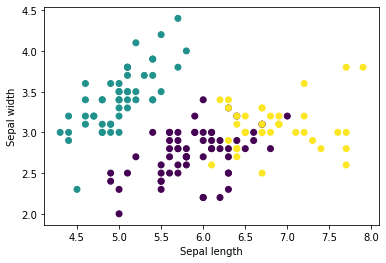

In [6]:
# İlk iki özelliği kullanarak grupları görselleştiriyoruz
plt.scatter(X[:, 0], X[:, 1], c=predictions)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.show

Bu proje sırasında, veri setini yükledik, verilerin histogramını oluşturduk, verileri eğitim ve test veri setlerine ayırdık, K-Means algoritmasını kullanarak eğitim verilerini sınıflandırdık ve test verilerini tahmin ettik. Tahmin sonuçlarını değerlendirdik. Son olarak ilk iki özelliği görselleştirdik.

Bu proje sırasında kullandığımız bazı önemli fonksiyonlar ve kavramlar şunlardır:

->***load_iris***: Iris veri setini yükler.

->***KMeans***: K-Means algoritmasını uygular.

->***fit***: Algoritmayı verilere göre eğitir.

->***predict***: Verileri sınıflandırır.

->***accuracy_score***: Sınıflandırma doğruluğunu ölçer.

->***confusion_matrix***: Tahminlerin doğruluğunu gösterir.
